Источники: 
- https://habr.com/ru/post/125898/, 
- http://networkx.lanl.gov/reference/index.html, 
- https://www.cl.cam.ac.uk/~cm542/teaching/2010/stna-pdfs/stna-lecture8.pdf, 
- https://networkx.org/documentation/latest/

# Примеры работы с NetworkX

In [1]:
! pip install networkx

In [2]:
import networkx as nx

## Класс граф

Поддерживаются следующие основные типы графов:
- Graph – реализация простого неориентированного графа. Дополнительные вершины между двумя узлами игнорируются, возможны узлы соединённые с самим собой.
- DiGraph — ориентированный граф, добавлены функции и ограничения специфические для этого типа графов.
- MultiGraph — реализация мультиграфов, в таких графах граф, возможно существование пар вершин, которые соединены более чем одним ребром (ненаправленным), либо более чем двумя дугами противоположных направлений.
- MultiDiGraph — соответственно ориентированный мультиграф.

Примеры создания пустых графов:

In [2]:
G=nx.Graph()
G=nx.DiGraph()
G=nx.MultiGraph()
G=nx.MultiDiGraph()

## Создание графа


На данный момент граф может быть создан с использованием одного из трёх методов:

- Генератор графов — предопределённые классы для создания графов общих топологий, таких как полные графы различных уровней, сбалансированные деревья, циклические графы, графы Дороговцева — Гольтцева — Мендеса, случайные биномиальные и многих других типов. Подробнее в документации: networkx.lanl.gov/reference/generators.html

- Загрузка данных и формирование графа на основе файла или потока данных одного из поддерживаемых форматов: Матрица смежности, Матрица инцидентности, GEXF,GML,Pickle,GraphML,LEDA,YAML,SparseGraph6,Pajek,GIS Shapefile

- Последовательное добавление узлов и дуг.


Созданный граф имеет как общие, так и специфические для своего типа методы.

In [3]:
G=nx.Graph()
G.add_edge(1,2)  # значение по умолчанию для дуги задаётся = 1
G.add_edge(2,3,weight=0.9) # задаётся значение атрибута

В качестве добавляемых значений могут служить данные разнообразных типов:

In [4]:
import math
G.add_edge('y','x',function=math.cos)
G.add_node(math.cos) # любой объект типа hashable может быть узлом

Дуги могут быть добавлены также и из массивов и котрежей данных:

In [5]:
elist=[('a','b',5.0),('b','c',3.0),('a','c',1.0),('c','d',7.3)]
G.add_weighted_edges_from(elist)

## Получение информации о графе

Кроме создания графа обычно нужно получать информацию о его узлах, дугах, путях и пр. Основными методами для этого является получение массивов узлов и дуг (edges() и nodes() соответственно), а также получение итератора по узлам и дугам (edges_iter() и nodes_iter() соответственно).
Дополнительно существует большое количество функций получения более специфической информации о графе, к примеру nx.triangles(G,n) вернёт количество треугольников в графе G в которых вершина n является одним из узлов.
Все доступные функции описаны в разделе документации по адресу networkx.lanl.gov/reference/algorithms.

## Предопределённые алгоритмы

В библиотеке реализовано большое количество типичных для работы над графами алгоритмов. Реализованы такие алгоритмы как нахождение кратчайшего пути, поиска в высоту и ширину, кластеризация, нахождение изоморфизма графов и многое другое.
К примеру, алгоритм Дейкстры нахождения минимального пути на взвешенном графе реализуется следующим образом:

In [6]:
G=nx.Graph()
e=[('a','b',0.3),('b','c',0.9),('a','c',0.5),('c','d',1.2)]
G.add_weighted_edges_from(e)
print(nx.dijkstra_path(G,'a','d'))

['a', 'c', 'd']


## Визуализация графов

Основной целью библиотеки является работа с графами, и их визуальное отображение вторично, но реализовано, так-как является важным инструментом анализа.
Предоставлены удобные методы для отображения графов с использованием Python библиотеки Matplotlib или внешнего модуля Graphviz для боле сложных случаев. Полная документация о возможностях визуализации приведена по адресу networkx.lanl.gov/reference/drawing.html.
Простой пример визуализации графа:

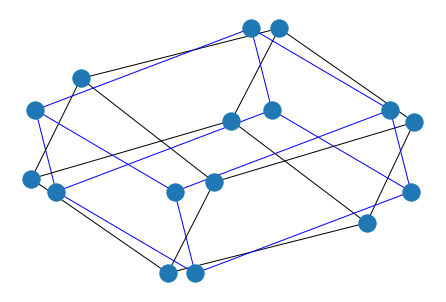

In [7]:
G=nx.cubical_graph()
nx.draw(G)   # тип по умолчанию spring_layout
nx.draw(G,pos=nx.spectral_layout(G), nodecolor='r',edge_color='b')

## Структуры данных

In [8]:
G=nx.Graph()
G.add_edge(1,2,color='red',weight=0.84,size=300)
print(G[1][2]['size'])

300


# Еще примеры

**Пример 1** http://asocialnetworks.blogspot.com/2016/02/python-networkx.html

Для примера будем использовать одну из баз данных Ю. Лесковца по сетям в Фейсбуке.

Зайдем на эту страницу: https://snap.stanford.edu/data/egonets-Facebook.html
        
Скачаем оттуда файл "facebook_combined.txt.gz"

Как понятно из описания, это дружеские сети пользователей Фейсбука

Это 10 эго-сетей, соединенных в одну большую сеть

In [9]:
### Распакованный файл положим туда, где у нас рабочая директория
import os
os.getcwd()

'/Users/zukhbaanastasiya/Desktop/МОБОД/2'

In [10]:
### Прочитаем наш файл и назовет граф "g"
g = nx.read_edgelist("facebook_combined.txt")

In [11]:
# Посмотрим на количество узлов в графе
g.number_of_nodes()

4039

In [12]:
# Посмотрим на количество связей в графе
g.number_of_edges()

88234

In [13]:
# Можно посмотреть список всех узлов, набрав g.nodes(),
# А список связей между ними - набрав g.edges()
# Не будем этого здесь делать, потому что 4 тысячи узлов и их связи занимают много места :)

In [14]:
### Визуализация графа
# Сами авторы пишут, что их пакет плохо умеет визуализацию графов
# Поэтому используются другие пакеты из группы научных пакетов Python'a

# Импортируем для этих целей пакет "pylab"
import pylab as plt


In [15]:
# Нарисуем граф и сохраним его в .png. Он должен сохраниться в нашей рабочей директории
nx.draw(g)
plt.savefig('graph.png')
plt.close()

<img width=600 src="graph.png">

In [16]:

### Описательная статистика графа
## Степень
# Можно посмотреть степень каждого узла, набрав "g.degree()"
g.degree()

DegreeView({'0': 347, '1': 17, '2': 10, '3': 17, '4': 10, '5': 13, '6': 6, '7': 20, '8': 8, '9': 57, '10': 10, '11': 1, '12': 1, '13': 31, '14': 15, '15': 1, '16': 9, '17': 13, '18': 1, '19': 16, '20': 15, '21': 65, '22': 11, '23': 17, '24': 16, '25': 69, '26': 68, '27': 5, '28': 13, '29': 13, '30': 17, '31': 23, '32': 6, '33': 2, '34': 5, '35': 2, '36': 11, '37': 1, '38': 9, '39': 15, '40': 44, '41': 24, '42': 2, '43': 1, '44': 6, '45': 12, '46': 5, '47': 2, '48': 22, '49': 4, '50': 11, '51': 7, '52': 2, '53': 31, '54': 8, '55': 17, '56': 78, '57': 15, '58': 12, '59': 19, '60': 8, '61': 3, '62': 26, '63': 6, '64': 7, '65': 12, '66': 15, '67': 76, '68': 9, '69': 10, '70': 2, '71': 3, '72': 24, '73': 10, '74': 1, '75': 14, '76': 3, '77': 6, '78': 9, '79': 12, '80': 23, '81': 3, '82': 34, '83': 7, '84': 13, '85': 14, '86': 6, '87': 13, '88': 20, '89': 8, '90': 2, '91': 8, '92': 21, '93': 8, '94': 22, '95': 6, '96': 9, '97': 3, '98': 49, '99': 13, '100': 9, '101': 19, '102': 6, '103': 16,

In [17]:
## Посмотрим на распределение степени на графике
degree = g.degree()
degree_values = sorted(set(dict(degree).values()))
degree_values

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187

In [18]:
## Посмотрим на распределение степени на графике
degree = g.degree()
degree_values = sorted(set(dict(degree).values()))

hist = [list(dict(degree).values()).count(x) for x in degree_values]
plt.figure()
plt.plot(degree_values, hist,'ro-')
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Facebook Graph')
plt.savefig('facebook_degree_plot.png')
plt.close()

# Получившийся график должен появиться в рабочей директории

<img width=600 src="facebook_degree_plot.png">

In [19]:
### Центральности
# Так как наш граф ненаправленный, мы можем проделать не так много всего.
# Посчитаем 3 стандарные меры центральностей: betweenness, closeness, eigenvector
# На моем компьютере это заняло достаточно длительное время,
# networkx правда не идеален для таких больших графов.

# Betweenness centrality, или посредничество
# Эта мера показывает, насколько узел связывает несколько несвязанных сообществ,
# или занимает позицию "между"
bet_centr = nx.betweenness_centrality(g)

# Closeness centrality
# Эта мера показывает, насколько узел близок ко всем остальным узлам в сети
clo_centr = nx.closeness_centrality(g)

# Eigenvector centrality
# Эта мера показывает, насколько узел связан с узлами,
# которые сами имеют большое количество связей
eig_centr = nx.eigenvector_centrality(g)

# Получаем индидивидуальные меры посредничества, близости и eigenvector для каждого узла
print(bet_centr)
print(clo_centr)
print(eig_centr)

{'0': 0.14630592147442917, '1': 2.7832744209034606e-06, '2': 7.595021178512074e-08, '3': 1.6850656559280464e-06, '4': 1.8403320547933104e-07, '5': 2.205964164092193e-06, '6': 2.4537760730577472e-08, '7': 0.0001702984836730339, '8': 2.7604980821899654e-07, '9': 1.6454236303026905e-05, '10': 4.986739552037655e-08, '11': 0.0, '12': 0.0, '13': 1.7622717578436846e-06, '14': 5.582871686568508e-07, '15': 0.0, '16': 1.9979459275532697e-07, '17': 4.1066669000480344e-07, '18': 0.0, '19': 5.062957964075819e-06, '20': 6.793693332142838e-07, '21': 0.0009380243844653233, '22': 6.703002200833232e-07, '23': 6.860348937590618e-06, '24': 1.3673472422981514e-07, '25': 5.38808313945586e-05, '26': 1.935436798204632e-05, '27': 3.067220091322184e-08, '28': 3.812160659244892e-07, '29': 1.3954817951917517e-06, '30': 1.3694627409316544e-06, '31': 4.932641252790837e-06, '32': 0.0, '33': 0.0, '34': 0.0036020881281963652, '35': 0.0, '36': 2.726417858953052e-08, '37': 0.0, '38': 7.344481172858835e-07, '39': 9.54863

In [24]:
results = [(k,bet_centr[k],clo_centr[k],eig_centr[k]) for k in g]
results

[('0', 0.14630592147442917, 0.35334266713335666, 3.3917961722702005e-05),
 ('1', 2.7832744209034606e-06, 0.2613761408505405, 6.045346134948106e-07),
 ('2', 7.595021178512074e-08, 0.26125776397515527, 2.2334609371911963e-07),
 ('3', 1.6850656559280464e-06, 0.2613761408505405, 6.63564808392105e-07),
 ('4', 1.8403320547933104e-07, 0.26125776397515527, 2.2364157028893598e-07),
 ('5', 2.205964164092193e-06, 0.2613084837895554, 1.1833221118435212e-06),
 ('6', 2.4537760730577472e-08, 0.26119016817593793, 2.1709041695161255e-07),
 ('7', 0.0001702984836730339, 0.2747686445291236, 2.568510124822488e-05),
 ('8', 2.7604980821899654e-07, 0.2612239617026782, 2.1973746334830277e-07),
 ('9', 1.6454236303026905e-05, 0.2620546433902265, 2.214116624486093e-06),
 ('10', 4.986739552037655e-08, 0.26125776397515527, 7.70856704409262e-07),
 ('11', 0.0, 0.26110572259941806, 2.1031233303459659e-07),
 ('12', 0.0, 0.26110572259941806, 2.1031233303459659e-07),
 ('13', 1.7622717578436846e-06, 0.26161321671525756, 1

**Пример 2**

Отображение узлов в matplotlib с использованием networkx

In [25]:
import matplotlib.pyplot as mplt # importing matplotlib package and pyplot is for displaying the graph on canvas 
b=nx.Graph()
b.add_node('helloworld')
b.add_node(1)
b.add_node(2)
'''Node can be called by any python-hashable obj like string,number etc'''
nx.draw(b)  #draws the networkx graph containing nodes which are declared till before
mplt.show()  # displays the networkx graph on matplotlib canvas

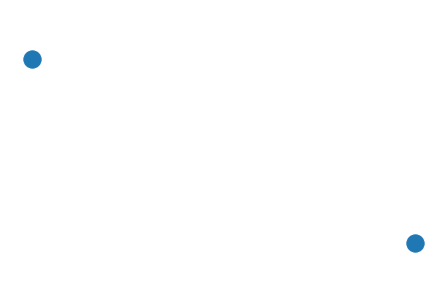

In [26]:
nx.draw(b,nodelist=[1,'helloworld']) #displays the particular nodes which are given by nodelist only 
mplt.show()

In [27]:
nx.draw_networkx(b,nodelist=[1,'helloworld']) #displays the node along with its name given by us i.e 1, hello  respectively
mplt.show()

Facebook использовал бы обычный Graph (), потому что нет ничего особенного в отношении края между узлами. Этот пример в Facebook может иметь только один край (дружбу) между узлами.

In [ ]:
facebook = nx.Graph()  
facebook.add_node('you')
facebook.add_node('me')
if both_agree_to_be_friends('you','me'):
    facebook.add_edge('you','me') #order isn't important here.

Другим типом графа будет Directed Graph. Twitter будет использовать Directed Graph, потому что узлы имеют направление. В Твиттере я могу следовать за тобой, но ты не должен следовать за мной. Поэтому мы могли бы представить это с помощью этого кода:

In [ ]:
twitter = nx.DiGraph()
twitter.add_node('you')
twitter.add_node('me')
twitter.add_edge('me','you') #order is important here.

**Пример 3**

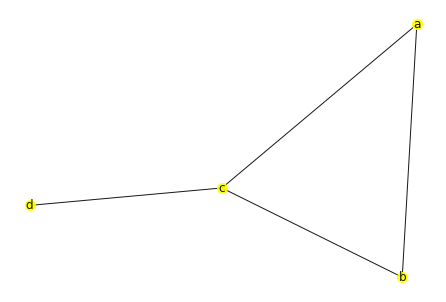

In [14]:
import matplotlib.pyplot as mplt
G=nx.Graph()
e=[('a','b',0.3),('b','c',0.9),('a','c',0.5),('c','d',1.2)]
G.add_weighted_edges_from(e)

nx.draw(G, with_labels=True, node_color="yellow", alpha= 0.9, node_size=100)
mplt.savefig("edge_names.png")
mplt.show()

**draw_networkx parameters**
- G (graph) – A networkx graph
- pos (dictionary, optional) – A dictionary with nodes as keys and positions as values. If not specified a spring layout positioning will be computed. See networkx.drawing.layout for functions that compute node positions.
- arrows (bool, optional (default=True)) – For directed graphs, if True draw arrowheads. Note: Arrows will be the same color as edges.
- arrowstyle (str, optional (default=’-|>’)) – For directed graphs, choose the style of the arrowsheads. See :py:class: matplotlib.patches.ArrowStyle for more options.
- arrowsize (int, optional (default=10)) – For directed graphs, choose the size of the arrow head head’s length and width. See :py:class: matplotlib.patches.FancyArrowPatch for attribute mutation_scale for more info.
- with_labels (bool, optional (default=True)) – Set to True to draw labels on the nodes.
- ax (Matplotlib Axes object, optional) – Draw the graph in the specified Matplotlib axes.
- nodelist (list, optional (default G.nodes())) – Draw only specified nodes
- edgelist (list, optional (default=G.edges())) – Draw only specified edges
- node_size (scalar or array, optional (default=300)) – Size of nodes. If an array is specified it must be the same length as nodelist.
- node_color (color or array of colors (default=’#1f78b4’)) – Node color. Can be a single color or a sequence of colors with the same length as nodelist. Color can be string, or rgb (or rgba) tuple of floats from 0-1. If numeric values are specified they will be mapped to colors using the cmap and vmin,vmax parameters. See matplotlib.scatter for more details.
- node_shape (string, optional (default=’o’)) – The shape of the node. Specification is as matplotlib.scatter marker, one of ‘so^>v<dph8’.
- alpha (float, optional (default=None)) – The node and edge transparency
- cmap (Matplotlib colormap, optional (default=None)) – Colormap for mapping intensities of nodes
- vmin,vmax (float, optional (default=None)) – Minimum and maximum for node colormap scaling
- linewidths ([None | scalar | sequence]) – Line width of symbol border (default =1.0)
- width (float, optional (default=1.0)) – Line width of edges
- edge_color (color or array of colors (default=’k’)) – Edge color. Can be a single color or a sequence of colors with the same length as edgelist. Color can be string, or rgb (or rgba) tuple of floats from 0-1. If numeric values are specified they will be mapped to colors using the edge_cmap and edge_vmin,edge_vmax parameters.
- edge_cmap (Matplotlib colormap, optional (default=None)) – Colormap for mapping intensities of edges
- edge_vmin,edge_vmax (floats, optional (default=None)) – Minimum and maximum for edge colormap scaling
- style (string, optional (default=’solid’)) – Edge line style (solid|dashed|dotted,dashdot)
- labels (dictionary, optional (default=None)) – Node labels in a dictionary keyed by node of text labels
- font_size (int, optional (default=12)) – Font size for text labels
- font_color (string, optional (default=’k’ black)) – Font color string
- font_weight (string, optional (default=’normal’)) – Font weight
- font_family (string, optional (default=’sans-serif’)) – Font family
- label (string, optional) – Label for graph legend
- kwds (optional keywords) – See networkx.draw_networkx_nodes(), networkx.draw_networkx_edges(), and networkx.draw_networkx_labels() for a description of optional keywords.

**Пример 4**

In [3]:
import matplotlib.pyplot as plt 
nodes = [0,1,2,3] 
edges = [(0,1), (1,2), (3,1), (2,3)] 
nodeListA = [0,1] 
nodeListB = [2,3] 
G = nx.Graph() 
G.add_nodes_from(nodes) 
G.add_edges_from(edges) 
position = nx.circular_layout(G) 
nx.draw_networkx_nodes(G,position, nodelist=nodeListA, node_color="b") 
nx.draw_networkx_nodes(G,position, nodelist=nodeListB, node_color="r") 
nx.draw_networkx_edges(G,position) 
nx.draw_networkx_labels(G,position) 
plt.show() 

**Пример 5**

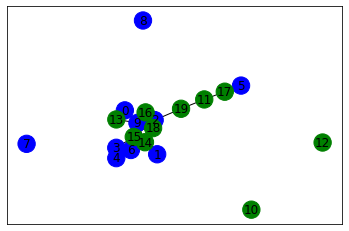

In [4]:
G = nx.erdos_renyi_graph(20, 0.1)
color_map = []
for node in G:
    if node < 10:
        color_map.append('blue')
    else: 
        color_map.append('green')      
nx.draw_networkx(G, node_color=color_map, with_labels=True)
plt.show()